In [2]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from tensorflow.keras.utils import to_categorical

# Ganti path ini jika file tidak berada di /content
data = pd.read_csv('/content/Sentiment.csv')
data = data[['text', 'sentiment']]


In [3]:
# Hilangkan entri 'Neutral'
data = data[data.sentiment != "Neutral"]

# Lowercase dan bersihkan karakter khusus
data['text'] = data['text'].apply(lambda x: x.lower())
data['text'] = data['text'].apply(lambda x: re.sub('[^a-zA-Z0-9\s]', '', x))

# Hilangkan "rt" (retweet) dari awal kalimat
data['text'] = data['text'].apply(lambda x: x.replace('rt', ''))

data.head()


<ipython-input-3-f8a56026e28b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['text'].apply(lambda x: x.lower())
<ipython-input-3-f8a56026e28b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['text'].apply(lambda x: re.sub('[^a-zA-Z0-9\s]', '', x))
<ipython-input-3-f8a56026e28b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

,text,sentiment
1,scottwalker didnt catch the full gopdebate la...,Positive
3,robgeorge that carly fiorina is trending hou...,Positive
4,danscavino gopdebate w realdonaldtrump delive...,Positive
5,gregabbotttx tedcruz on my first day i will r...,Positive
6,warriorwoman91 i liked her and was happy when...,Negative


In [4]:
max_features = 2000

tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(data['text'].values)
X = tokenizer.texts_to_sequences(data['text'].values)
X = pad_sequences(X)

# One-hot encoding untuk label
Y = pd.get_dummies(data['sentiment']).values

# Split data untuk training dan testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)


In [5]:
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_features, embed_dim, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Latih model
history = model.fit(X_train, Y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=2)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
180/180 - 36s - 201ms/step - accuracy: 0.8064 - loss: 0.4592 - val_accuracy: 0.8408 - val_loss: 0.3907
Epoch 2/5
180/180 - 40s - 225ms/step - accuracy: 0.8563 - loss: 0.3396 - val_accuracy: 0.8421 - val_loss: 0.3889
Epoch 3/5
180/180 - 40s - 224ms/step - accuracy: 0.8814 - loss: 0.2806 - val_accuracy: 0.8435 - val_loss: 0.3927
Epoch 4/5
180/180 - 41s - 227ms/step - accuracy: 0.8991 - loss: 0.2485 - val_accuracy: 0.8449 - val_loss: 0.4256
Epoch 5/5
180/180 - 41s - 230ms/step - accuracy: 0.9080 - loss: 0.2249 - val_accuracy: 0.8463 - val_loss: 0.4091


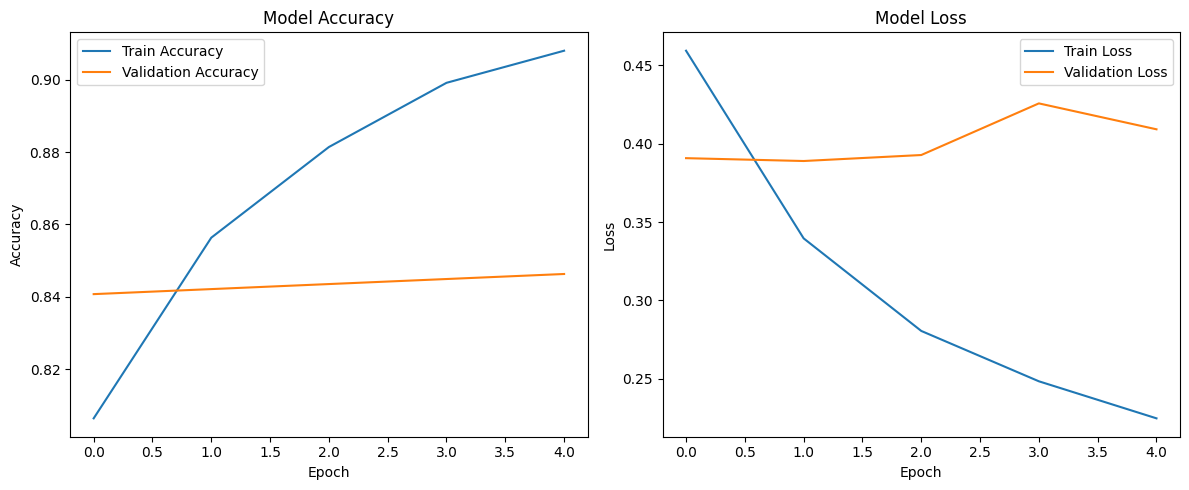

In [6]:
plt.figure(figsize=(12, 5))

# Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
